- Cada linha possui um projeto diferente de site web, como o site de uma escola, de uma padaria e assim por diante. As pessoas interessadas em criar sites para seus respectivos negócios submetem o projeto a uma empresa e estipulam o número de horas para que o projeto seja criado (expected_hours) , bem como a quantia a ser paga (price).

- A coluna unfinished mostra os projetos que foram finalizados (0) e os que não foram finalizados (1) - ou seja, se algum web designer pegou tal projeto, concordando com o prazo e o valor estipulados.

- A ideia é, a partir do conjunto de dados fornecido, tentarmos prever qual projeto será finalizado ou não. Dessa forma, podemos oferecer mais informações para as pessoas que submetem os projetos à plataforma, de forma que elas adequem suas estimativas.

In [1]:
# Carrega os dados de um arquivo CSV através de uma URL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
# Dicionário para renomear as colunas do DataFrame
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
# Renomeia as colunas do DataFrame
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
# Dicionário para substituir os valores da coluna 'nao_finalizado' por 'finalizado'
troca = {
    0 : 1,
    1 : 0
}
# Cria a coluna 'finalizado' com os valores alterados
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


# scatter plot dos dados

<Axes: xlabel='horas_esperadas', ylabel='preco'>

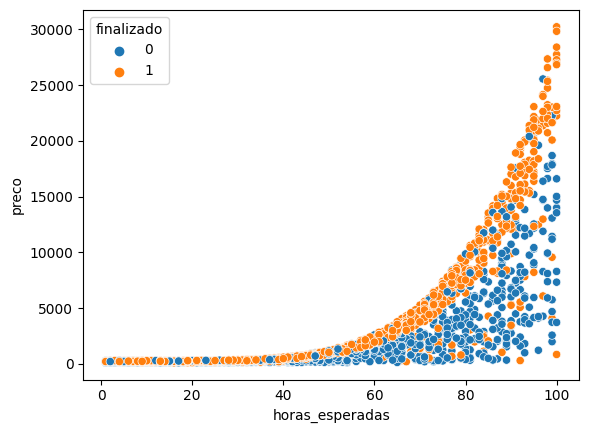

In [4]:
import seaborn as sns
# Cria um gráfico de dispersão (scatter plot) usando seaborn
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)
# O parâmetro 'hue' determina a cor dos pontos com base na coluna 'finalizado'

## plot relativo

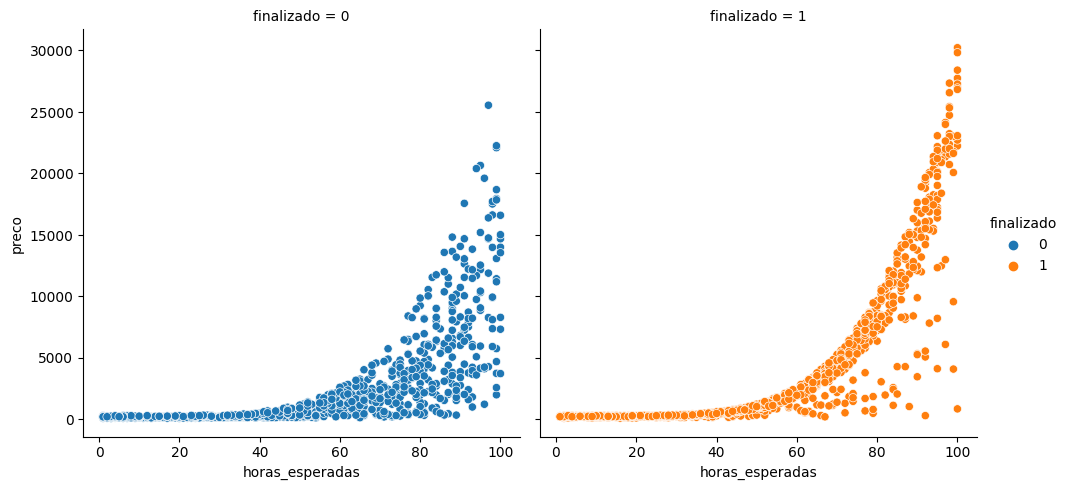

In [5]:
# Cria um gráfico de dispersão com múltiplas subplots usando seaborn
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [6]:
# Seleciona as colunas de entrada e saída
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# controlar a aleatoriedade
SEED = 20
# Divide os dados em conjuntos de treinamento e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

# Cria o modelo LinearSVC
modelo = LinearSVC()
# Treina o modelo com os dados de treinamento
modelo.fit(treino_x, treino_y)
# Faz previsões com o conjunto de teste
previsoes = modelo.predict(teste_x)

# Calcula a acurácia do modelo
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 53.33%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


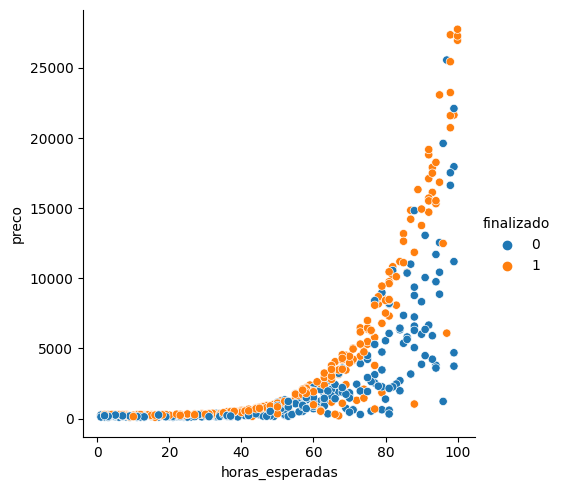

In [8]:
# gráfico mostra o padrão de treino X teste coerentes (análise visual)
sns.relplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

In [9]:
# delta de X e Y
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min, x_max,y_min,y_max)

1 100 101 27738


In [10]:
# soma entre pontos proporcional
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

In [11]:
# criar um grid
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()] # concatenando os valores
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [12]:
# fazendo as previsões
Z = modelo.predict(pontos)
Z.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


(10000,)

In [13]:
xx.shape

(100, 100)

In [14]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape) # redimensionar por 100x100
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

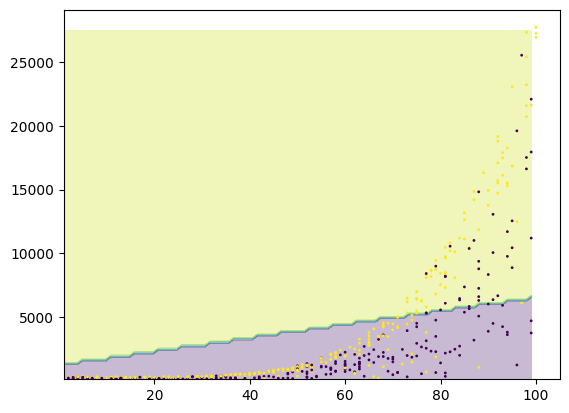

In [15]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# Decision Boundary